# Introduction to Data Science - Homework 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 26, 11:59pm.

This homework is designed to reinforce the skills we covered in weeks 1 and 2: working with loops, conditions, functions, and the built-in Python data structures. We'll also calcluate descriptive statistics, and sample from a distribution. Make sure to go through the lectures again in case you have any troubles.

In this homework we'll do calculations that are also available in NumPy. For Parts 1 and 2, however, **we want you to implement the solutions using standard python functionality and the math library, and then check your results using NumPy**. See the the [NumPy library](http://docs.scipy.org/doc/numpy-1.11.0/reference/routines.statistics.html) documentation, and include the checks as a separate code cell. 


**For Part 3, you should use the SciPy libary, specifically [SciPy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html).** 

## Your Data
Fill out the following information: 

*First Name:*   Brooke <br>
*Last Name:*   Stanislawski <br>
*E-mail:*   brooke.stanislawski@utah.edu <br>
*UID:*  u1142223 <br>


## Part 1: Vector data

We first will work with a vector of yearly average temperatures from New Haven published [here](https://vincentarelbundock.github.io/Rdatasets/datasets.html). The data is included in this repository in the file `nhtmep.csv`.

The data is stored in the CSV format, which is a simple textfile with 'Comma Seperated Values'.
To load the data to into a (nested) python array, we use the [csv](https://docs.python.org/3/library/csv.html) library. The following code reads the file and stores it in a vector:

In [1]:
# import the csv library
import csv
# import the math library we'll use later
import math
# import the numpy library
import numpy as np

# initialize the array
temperature_vector = []

# open the file and append the values of the last column to the array
with open('nhtemp.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # remove the first item as it is the title.
    next(filereader)
    for row in filereader:
        # here we append to the array and also cast from string to float
        temperature_vector.append(float(row[2]))
        
# print the vector to see if it worked
print (temperature_vector)

[49.9, 52.3, 49.4, 51.1, 49.4, 47.9, 49.8, 50.9, 49.3, 51.9, 50.8, 49.6, 49.3, 50.6, 48.4, 50.7, 50.9, 50.6, 51.5, 52.8, 51.8, 51.1, 49.8, 50.2, 50.4, 51.6, 51.8, 50.9, 48.8, 51.7, 51.0, 50.6, 51.7, 51.5, 52.1, 51.3, 51.0, 54.0, 51.4, 52.7, 53.1, 54.6, 52.0, 52.0, 50.9, 52.6, 50.2, 52.6, 51.6, 51.9, 50.5, 50.9, 51.7, 51.4, 51.7, 50.8, 51.9, 51.8, 51.9, 53.0]


We'll use the `temperature_vector` to calculate a couple of standard statistical measures next.

### Task 1.1: Calculate the Mean of a Vector

Write a function that calculates and returns the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) of a vector that you pass into it. 

Pass the temperature vector into this function and print the result. Provide a written interpretation of your results (e.g., "The mean temperature for New Haven for the years 1912 to 1971 is XXX degrees Fahrenheit.")

In [2]:
## your code goes here
def nhtemps_mean(temps_vector):
    sum_nhtemps = 0
    #print('range(len(temps_vector)) = ',range(len(temps_vector)))
    for i in range(len(temps_vector)):
        #print('i = ',i)
        sum_nhtemps += temps_vector[i]
        #print('sum = ', sum_nhtemps)
    #print('mean =',sum_nhtemps / len(temps_vector))
    return sum_nhtemps / len(temps_vector)

In [3]:
## call function and print
print('The mean temperature for New Haven for the years 1912 to 1971 is', nhtemps_mean(temperature_vector), 'degrees Fahrenheit.')

The mean temperature for New Haven for the years 1912 to 1971 is 51.16 degrees Fahrenheit.


In [4]:
# Check our results using NumPy
print('The mean temperature for New Haven for the years 1912 to 1971 is', np.mean(temperature_vector), 'degrees Fahrenheit.')

The mean temperature for New Haven for the years 1912 to 1971 is 51.16 degrees Fahrenheit.


**Your Interpretation:** The mean temperature for New Haven for the years 1912 to 1971 is 51.16 degrees Fahrenheit when computed with my function and when computed with the numpy library function.

### Task 1.2: Calculate the Median of a Vector
Write a function that calculates and returns the [median](https://en.wikipedia.org/wiki/Median) of a vector. Pass the temperature vector into this function and print the result. Make sure that your function works for both, functions with an even and with an odd number of elements. In case of an even number of elements, use the mean of the two middle values. Provide a written interpretation of your results.

Hint: the [`sorted()`](https://docs.python.org/3/library/functions.html#sorted) function might be helpful for this.

In [5]:
## your code goes here
def nhtemps_median(temps_vector):
    #first sort values into ascending order
    sorted_temps_vector = sorted(temps_vector)
    if len(temps_vector) % 2 == 0: #if even number of inputs
        return ((sorted_temps_vector[int(len(temps_vector)/2 - 1)]+sorted_temps_vector[int(len(temps_vector)/2)])/2)
    else: #if odd number of inputs
        return sorted_temps_vector[int(len(temps_vector)/2 - 0.5)]

In [6]:
## call function and print
print('The median value of New Haven temperatures for the years 1912 to 1971 is', nhtemps_median(temperature_vector), 'degrees Fahrenheit.')
print('The median value of New Haven temperatures for the years 1912 to 1970 is', nhtemps_median(temperature_vector[0:59]), 'degrees Fahrenheit.')

The median value of New Haven temperatures for the years 1912 to 1971 is 51.2 degrees Fahrenheit.
The median value of New Haven temperatures for the years 1912 to 1970 is 51.1 degrees Fahrenheit.


In [7]:
# Check with numpy here
print('The median value of New Haven temperatures for the years 1912 to 1971 is', np.median(temperature_vector), 'degrees Fahrenheit, as calculated by numpy function.')
print('The median value of New Haven temperatures for the years 1912 to 1970 is', np.median(temperature_vector[0:59]), 'degrees Fahrenheit, as calculated by numpy function.')

The median value of New Haven temperatures for the years 1912 to 1971 is 51.2 degrees Fahrenheit, as calculated by numpy function.
The median value of New Haven temperatures for the years 1912 to 1970 is 51.1 degrees Fahrenheit, as calculated by numpy function.


**Your Interpretation:** The median value of New Haven temperatures for the years 1912 to 1971 is 51.2 degrees Fahrenheit, as calculated by both my own function and the numpy function.  When given a list that contains an odd number of values, such as the list of New Haven temperatures for the years 1912 to 1970, the median value is calculated as 51.1 degrees Fahrenheit by both my own function and the numpy function.

### Task 1.3: Calculate the Standard Deviation of a Vector

Write a function that calculates and returns the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of a vector. Pass the temperature vector into this function and print the result. Provide a written interpretation of your results.

The standard deviation is the square root of the average of the squared deviations from the mean, i.e.,

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} {{(x_i - \mu)}^2} }$$

where $\mu$ is the mean of the vector. Hint: use your mean function to calculate it.

Hint: the `sqrt()` function from the [`math library`](https://docs.python.org/3/library/math.html) might be helpful for this. If you use a seperate file you need to load the library as we did in Part 1 to read in the data. The import looks like this:

In [8]:
## your code goes here
def nhtemps_stddev(temps_vector):
    dev_vector_sqrd = [0]*len(temps_vector)
    for i in range(len(temps_vector)):
        dev_vector_sqrd[i] = (temps_vector[i] - nhtemps_mean(temps_vector))**2
        #print('dev_vector_sqrd = ',dev_vector_sqrd)
    return math.sqrt(nhtemps_mean(dev_vector_sqrd))

In [9]:
## call function and print
print('The standard deviation is', nhtemps_stddev(temperature_vector))

The standard deviation is 1.2550166001558176


In [10]:
# Check with numpy here
print('The standard deviation is', np.std(temperature_vector),'when calculated with numpy function')

The standard deviation is 1.25501660016 when calculated with numpy function


**Your Interpretation:** The standard deviation of the New Haven temperatures for the years 1912 to 1971 is 1.255 degrees Fahrenheit, as calculated by both my function and the numpy function.

### Task 1.4: Histogram

Write a function that takes a vector and an integer `b` and calculates a [histogram](https://en.wikipedia.org/wiki/Histogram) with `b` bins. The function should return an array containing two arrays. The first should be the counts for each bin, the second should contain the borders of the bins.

For `b=5` your output should look like this: 

`[[3, 12, 33, 10, 2], [47.9, 49.24, 50.58, 51.92, 53.26, 54.6]]`

Here, the first array gives the size of these bins, the second defines the bands. I.e., the first band from 47.9-49.24 has 3 entries, the second, from 49.24-50.58 has 12 entries, etc. 

Provide a written interpretation of your results. Comment on whether the histogram is skewed, and if so, in which direction.

In [11]:
## your code goes here
def nhtemps_hist(temps_vector,b):
    bin_borders = [0]*(b+1)
    count_vec = [0]*b
    bin_borders[0] = sorted(temps_vector)[0]
    bin_interval = (sorted(temps_vector)[-1]-bin_borders[0]) / b #keeping bins of equal size
    for i in range(1,len(bin_borders)): #create bins
        count = 0
        #bin_borders[i] = round(bin_borders[i-1]+bin_interval,2)
        bin_borders[i] = bin_borders[i-1]+bin_interval
        for j in range(len(temps_vector)): # count number of values within that bin
            if temps_vector[j] >= bin_borders[i-1] and temps_vector[j] <= bin_borders[i]:
                count += 1
        count_vec[i-1] = count
    return [count_vec, bin_borders]

## what about rounding to match the numpy output format?

In [12]:
## call function and print
b = 3
print('Counts for each bin, borders of the bins = ', nhtemps_hist(temperature_vector,b),'\n')

b = 5
print('Counts for each bin, borders of the bins = ', nhtemps_hist(temperature_vector,b),'\n')

b = 6
print('Counts for each bin, borders of the bins = ', nhtemps_hist(temperature_vector,b),'\n')

#"rule of thumb bin size" = sqrt(number of data points)
b = 7
print('Counts for each bin, borders of the bins = ', nhtemps_hist(temperature_vector,b),'\n')

b = 8
print('Counts for each bin, borders of the bins = ', nhtemps_hist(temperature_vector,b),'\n')

Counts for each bin, borders of the bins =  [[11, 41, 8], [47.9, 50.13333333333333, 52.36666666666667, 54.6]] 

Counts for each bin, borders of the bins =  [[3, 12, 33, 10, 2], [47.9, 49.24, 50.580000000000005, 51.92000000000001, 53.26000000000001, 54.600000000000016]] 

Counts for each bin, borders of the bins =  [[3, 8, 19, 22, 6, 2], [47.9, 49.016666666666666, 50.13333333333333, 51.25, 52.36666666666667, 53.483333333333334, 54.6]] 

Counts for each bin, borders of the bins =  [[3, 7, 9, 22, 13, 4, 1], [47.9, 48.857142857142854, 49.81428571428571, 50.771428571428565, 51.72857142857142, 52.685714285714276, 53.64285714285713, 54.59999999999999]] 

Counts for each bin, borders of the bins =  [[2, 5, 7, 16, 20, 6, 2, 1], [47.9, 48.7375, 49.574999999999996, 50.412499999999994, 51.24999999999999, 52.08749999999999, 52.92499999999999, 53.76249999999999, 54.59999999999999]] 



In [13]:
# Check with numpy here

b = 3
print('Counts for each bin, borders of the bins = ', np.histogram(temperature_vector,bins=b),'as calculated by numpy function \n')

b = 5
print('Counts for each bin, borders of the bins = ', np.histogram(temperature_vector,bins=b),'as calculated by numpy function \n')

b = 6
print('Counts for each bin, borders of the bins = ', np.histogram(temperature_vector,bins=b),'as calculated by numpy function \n')

b = 7
print('Counts for each bin, borders of the bins = ', np.histogram(temperature_vector,bins=b),'as calculated by numpy function \n')

b = 8
print('Counts for each bin, borders of the bins = ', np.histogram(temperature_vector,bins=b),'as calculated by numpy function \n')

Counts for each bin, borders of the bins =  (array([11, 41,  8], dtype=int64), array([ 47.9       ,  50.13333333,  52.36666667,  54.6       ])) as calculated by numpy function 

Counts for each bin, borders of the bins =  (array([ 3, 12, 33, 10,  2], dtype=int64), array([ 47.9 ,  49.24,  50.58,  51.92,  53.26,  54.6 ])) as calculated by numpy function 

Counts for each bin, borders of the bins =  (array([ 3,  8, 19, 22,  6,  2], dtype=int64), array([ 47.9       ,  49.01666667,  50.13333333,  51.25      ,
        52.36666667,  53.48333333,  54.6       ])) as calculated by numpy function 

Counts for each bin, borders of the bins =  (array([ 3,  7,  9, 22, 13,  4,  2], dtype=int64), array([ 47.9       ,  48.85714286,  49.81428571,  50.77142857,
        51.72857143,  52.68571429,  53.64285714,  54.6       ])) as calculated by numpy function 

Counts for each bin, borders of the bins =  (array([ 2,  5,  7, 16, 20,  6,  2,  2], dtype=int64), array([ 47.9   ,  48.7375,  49.575 ,  50.4125,  5

**Your interpretation:** The function above outputs an array showing the frequency of a value falling into each bin and a second array showing the bin border values.  When b = 5 bins, the New Haven temperatures for the years 1912 to 1971 are divided into 5 bins with the following border values: [ 47.9 ,  49.24,  50.58,  51.92,  53.26,  54.6 ].  There are 3 years with temperatures that fall into the first bin, 12 temperature values that fall into the second bin, 33 into the third, 10 into the 4th, and 2 into the fifth/last bin.

As a rule of thumb, bin size can be determined by calculated the square root of the number of data points.  We have 60 data points, so the closest number of gins are 7 and 8.  When b = 7 bins, there are an equal number of data points on the left and on the right of the center bin.  When b = 8 bins, there are an equal number of data points in the left 4 bins as in the right 4 bins.  This is again represented by the fact that the mean (51.16 deg F) and the median (51.2 deg F) are very close.  Therefore, this histogram is not skewed.

## Part 2: Working with Matrices

For the second part of the homework, we are going to work with matrices. The [dataset we will use](https://www.wunderground.com/history/airport/KSLC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=) contains different properties of the weather in Salt Lake City for 2015 (temperature, humidity, sea level, ...). It is stored in the file [`SLC_2015.csv`](SLC_2015.csv) in this repository.

We first read the data from the file and store it in a nested python array (`weather_matrix`). A nested python array is an array, where each element is an array itself. Here is a simple example: 

In [14]:
arr1 = [1,2,3]
arr2 = ['a', 'b', 'c']

nestedArr = [arr1, arr2]
nestedArr

[[1, 2, 3], ['a', 'b', 'c']]

We provide you with the import code, which will write the data into the nested list `temperature_matrix`. The list contains one list for each month, which, in turn, contain the mean temparature of every day of that month. 

In [15]:
# initialize the 12 arrays for the months
temperature_matrix = [[] for i in range(12)]

# open the file and append the values of the last column to the array
with open('SLC_2015.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # get rid of the header
    next(filereader)
    for row in filereader:
        month = int(row[0].split('/')[0])
        mean_temp = int(row[2])
        temperature_matrix[month-1].append(mean_temp)

print(temperature_matrix)

# the mean tempertarure on August 23. Note the index offset:
print("Mean temp on August 23: " + str(temperature_matrix[7][22]))

[[15, 19, 26, 28, 37, 38, 38, 36, 35, 31, 39, 36, 35, 30, 31, 31, 37, 44, 40, 35, 31, 31, 31, 33, 42, 41, 44, 42, 36, 40, 39], [39, 49, 50, 50, 53, 57, 60, 53, 55, 45, 43, 47, 46, 48, 43, 40, 38, 44, 47, 44, 39, 33, 31, 35, 44, 35, 37, 36], [40, 37, 34, 33, 39, 43, 45, 45, 46, 50, 54, 50, 51, 56, 62, 63, 61, 53, 47, 53, 57, 54, 52, 47, 42, 48, 56, 62, 53, 57, 63], [46, 44, 44, 54, 60, 50, 52, 46, 49, 53, 58, 50, 57, 56, 33, 44, 50, 54, 56, 56, 60, 61, 61, 59, 51, 46, 50, 57, 65, 63], [63, 71, 68, 67, 62, 59, 58, 57, 49, 53, 59, 68, 65, 65, 53, 48, 56, 58, 55, 59, 58, 58, 55, 57, 62, 59, 61, 61, 64, 71, 76], [80, 68, 69, 68, 69, 70, 66, 73, 77, 78, 72, 74, 75, 76, 81, 77, 78, 83, 83, 78, 81, 78, 78, 83, 82, 84, 87, 88, 91, 89], [87, 87, 87, 89, 79, 79, 76, 75, 73, 72, 77, 79, 81, 77, 80, 80, 79, 74, 74, 73, 76, 77, 75, 78, 78, 84, 77, 66, 70, 76, 79], [80, 79, 69, 76, 82, 74, 76, 69, 72, 79, 83, 81, 83, 88, 83, 79, 77, 72, 74, 76, 81, 74, 76, 84, 85, 78, 77, 80, 85, 82, 75], [82, 83, 82

We will now use the nested array `temperature_matrix` to compute the same metrics as in Part 1.

**Note:** Since the lists in the matrix are of varying lengths (28 to 31 days) many of the standard NumPy functions won't work.

### Task 2.1: Calculates the mean of a whole matrix

Write a function that calculates the mean of a matrix. For this version calculate the mean over all elements in the matrix as if it was one large vector. 
Pass in the matrix with the weather data and return the result. Provide a written interpretation of your results.
Can you use your function from Part 1 and get a valid result?

In [16]:
## your code goes here

#this function takes in two argurments:
# temperature matrix AND a boolean variable called "monthly"
#    if using this function to compute monthly means, monthly = True
#    if using this function to compute annual mean, monthly = False

# def annual_mean(temps_matrix,monthly): # "monthly" is boolean value so that this function can be used for Task 2.2
#     monthly_mean = [0] * len(temps_matrix)
#     for i in range(len(temps_matrix)):
#         #print('i = ',i)
#         monthly_mean[i] = nhtemps_mean(temps_matrix[i])
#     if monthly: #if using this function to compute monthly means, monthly = True
#         return monthly_mean
#     else: #if using this function to compute annual means, monthly = False
#         return nhtemps_mean(monthly_mean)
    
def annual_mean(temps_matrix): # "monthly" is boolean value so that this function can be used for Task 2.2
    matrix_vector = [i for x in temps_matrix for i in x]
    return nhtemps_mean(matrix_vector)

In [17]:
# print('annual matrix mean = ',annual_mean(temperature_matrix, False), '\n')

# print('monthly mean = ',annual_mean(temperature_matrix, True))

print('annual matrix mean = ', annual_mean(temperature_matrix))

annual matrix mean =  56.76712328767123


In [20]:
# here we create a flat version of the matrix that works well for np checks
flat_data = [i for x in temperature_matrix for i in x]
# check your data with numpy here
print('np matrix mean = ',np.mean(flat_data))

# np_monthly_mean = [0] * len(temperature_matrix)
# for j in range(len(temperature_matrix)):
#     np_monthly_mean[j] = np.mean(temperature_matrix[j])
# print('np monthly mean values = ',np_monthly_mean)

np matrix mean =  56.7671232877


**Your Interpretation:** The mean of all the recorded daily mean temperatures from 2015 in Salt Lake City is 56.77 deg F as calculated by my function and by the numpy function. My function re-uses my mean function from Part 1.

### Task 2.2:  Calculate the mean of each vector of a matrix

Write a function that calculates the mean temperature of each month and returns an array with the means for each column. Provide a written interpretation of your results. Can you use the function you implemented in Part 1 here efficiently? If so, use it.

In [ ]:
## your code goes here
## ?? my previous function kind of did this already so that I could re-use my function from Part 1.  Is this ok ??

def monthly_mean(temps_matrix,monthly):
    return annual_mean(temps_matrix,monthly)


In [ ]:
print(monthly_mean(temperature_matrix,True))

**Your Interpretation:** The mean temperature in January 2015 in Salt Lake City was 34.5 deg F, the mean temperature in February 2015 was 44.32 deg F, March: 50.1 deg F, April: 52.8 deg F, May: 60.5 deg F, and continuing to December: 31.5 deg F.  I was able to use my function from Task 2.1, which uses my function from Part 1, with some modifications for which values to return.

### Task 2.3:  Calculate the median of a whole matrix

Write a function that calculates and returns the median of a matrix over all values (independent from which row they are coming) and returns it. Provide a written interpretation of your results. Can you use your function from Part 1 and get a valid result?

In [ ]:
## your code goes here
def matrix_median(temps_matrix):
# build one long vector from the matrix values
#     matrix_vector = []
#     for i in range(len(temps_matrix)):
#         matrix_vector.append(temps_matrix[i])
#     return matrix_vector
    matrix_vector = [i for x in temps_matrix for i in x]
    return nhtemps_median(matrix_vector)

# this doesn't work

# use "column" to access elements in each column
        

In [ ]:
matrix_median(temperature_matrix)

In [ ]:
print('matrix_vector:',matrix_median(temperature_matrix),'\n')
temperature_matrix

In [ ]:
## check with numpy here
print('numpy matrix median = ',np.median(flat_data))

**Your Interpretation:** When evaluating all the daily mean temperatures from 2015 in Salt Lake City, the median temperature iis 57 deg F.

### Task 2.4: Calculate the median of each vector of a matrix

Write a function that calculates the median of each sub array (i.e. each column in the csv file) in the matrix and returns an array of medians (one entry for column in the csv file). To do so, use the function you implemented in Part 1. Provide a written interpretation of your results. 

In [ ]:
## your code goes here
def vector_median(temps_matrix):
    monthly_medians = [0] * len(temps_matrix)
    for i in range(len(temps_matrix)):
        monthly_medians[i] = nhtemps_median(temps_matrix[i])
    return monthly_medians

In [ ]:
print('monthly median values = ',vector_median(temperature_matrix))

In [ ]:
np_monthly_medians = [0] * len(temperature_matrix)
for j in range(len(temperature_matrix)):
    np_monthly_medians[j] = np.median(temperature_matrix[j])
print('np monthly median values = ',np_monthly_medians)

**Your Interpretation:** Examining the daily mean temperatures in January 2015 in Salt Lake City, the median temperature that month was 36 deg F.  In February 2015, the median temperature was 44 deg F, continuing onto December 2015, the median temperature was 32 deg F.

### Task 2.5: Calculate the standard deviation of a whole matrix

Write a function that calculates the standard deviation of a matrix over all values in the matrix (ignoring from which column they were coming) and returns it. Can you use your function from Part 1 and get a valid result? Provide a written interpretation of your results. 

In [ ]:
## your code goes here

In [ ]:
# Check with numpy here

**Your Interpretation:** TODO

### Task 2.6: Calculate the standard deviation of each vector of a matrix

Write a function that calculates the standard deviation of each array in the matrix and returns an array of standard deviations (one standard deviation for each column). To do so, use the function you implemented in Part 1.
Pass in the matrix with the temperature data and return the result. Provide a written interpretation of your results - is the standard deviation consistent across the seasons? 

In [ ]:
## your code goes here

def vector_std(temps_matrix):
    monthly_std = [0] * len(temps_matrix)
    for i in range(len(temps_matrix)):
        monthly_std[i] = nhtemps_stddev(temps_matrix[i])
    return monthly_std

In [ ]:
print('monthly std dev values = ',vector_std(temperature_matrix))

In [ ]:
np_monthly_std = [0] * len(temperature_matrix)
for j in range(len(temperature_matrix)):
    np_monthly_std[j] = np.std(temperature_matrix[j])
print('np monthly std values = ',np_monthly_std)

**Your Interpretation:** The standard deviation of the daily mean temperatures in January 2015 in Salt Lake City was 6.5 deg F.  In February 2015, the standard deviation was 7.3 deg F, in March, the standard deviation was 8.3 deg F, continuing onto December when the standard deviation was 9.0 deg F.

The months with the highest standard deviation were March (8.3 deg F), November (8.7 deg F), and December (9.0 deg F).  The months with the lowest standard deviation were July and August, which were 4.7 and 7.6 deg F respectively.  Therefore, it is clear that the standard deviation was not consistent across seasons, but it was somewhat consistent within seasons.  

## Part 3: Poisson distribution 

Another example of a discrete random variable is a Poisson random variable. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

**3.1 Descriptive statistics.** Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

TODO: A Poisson random variable is _____________________. The parameter λ is equal to the average number of events in an interval. 

**3.2 Example.** Give an example of an application that is described by a Poisson random variable.

TODO: Number of flights that take off per minute from LAX. ??

**3.3 Probability Mass Function.** For the parameter $\lambda = 2$, plot the probability mass function. 

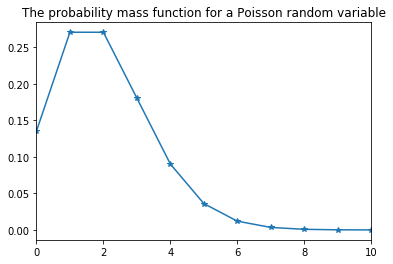

In [27]:
# your code
import scipy as sc
from scipy.stats import poisson
import matplotlib.pyplot as plt

n = 10
x = sc.arange(n+1);
mu = 2 #mu = lambda
f = lambda k: poisson.pmf(k,mu = mu)

plt.plot(x, f(x),'*-')
plt.title("The probability mass function for a Poisson random variable")
plt.xlim([0,n])
plt.show()

**3.4 Poission sampling.** Write python code that takes 1000 samples from the Poisson distribution with parameter $\lambda = 2$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

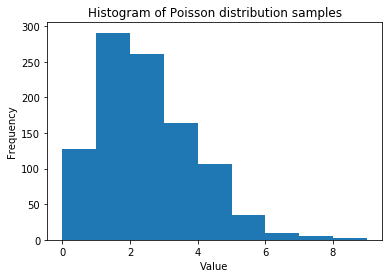

sample mean =  2.011
sample variance =  2.068879


In [38]:
# your code

mu = 2
n = 1000
samples = poisson.rvs(mu = mu,size = n)
#print(samples)

p = plt.hist(samples,np.arange(0,10))
plt.title("Histogram of Poisson distribution samples")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

sample_mean = np.mean(samples)
print('sample mean = ',sample_mean)
sample_variance = np.var(samples)
print('sample variance = ',sample_variance)

# n = 1000;
# coin_flips = bernoulli.rvs(p=0.5, size=n)
# print(coin_flips)


**Answer:** The histogram replicates the shape of the probability mass function.